In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Данные 

In [436]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

In [437]:
dataset_hist = pd.read_csv('wb_3_categories_100_history - wb_3_categories_100.csv', 
                           header=1, 
                           parse_dates=['Дата'], 
                           date_parser=dateparse)
dataset_overall = pd.read_csv('wb_3_categories_100_overall - wb_3_categories_100_overall.csv', 
                              header=1, 
                              parse_dates=['Дата'], 
                              date_parser=dateparse)

/Users/natalagalanova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [438]:
dataset_hist.shape, dataset_overall.shape

((4811, 16), (4828, 16))

In [439]:
dataset_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Артикул                       4811 non-null   int64         
 1   Дата                          4811 non-null   datetime64[ns]
 2   Остатки                       4811 non-null   object        
 3   Рейтинг                       4811 non-null   int64         
 4   Отзывы                        4811 non-null   int64         
 5   Продажи по карточке           4811 non-null   int64         
 6   Цена                          4811 non-null   int64         
 7   Старая цена                   4811 non-null   int64         
 8   Изменение остатков            4811 non-null   object        
 9   Новые отзывы                  4811 non-null   int64         
 10  Продажи за день               4811 non-null   int64         
 11  Новый ли товар на этот день?  

In [440]:
dataset_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Артикул                       4828 non-null   int64         
 1   Дата                          4828 non-null   datetime64[ns]
 2   Остатки                       4828 non-null   object        
 3   Рейтинг                       4828 non-null   int64         
 4   Отзывы                        4828 non-null   int64         
 5   Продажи по карточке           4828 non-null   int64         
 6   Цена                          4828 non-null   int64         
 7   Старая цена                   4828 non-null   int64         
 8   Изменение остатков            4828 non-null   object        
 9   Новые отзывы                  4828 non-null   int64         
 10  Продажи за день               4828 non-null   int64         
 11  Новый ли товар на этот день?  

In [441]:
dataset_overall.head()

,Артикул,Дата,Остатки,Рейтинг,Отзывы,Продажи по карточке,Цена,Старая цена,Изменение остатков,Новые отзывы,Продажи за день,Новый ли товар на этот день?,Продажи за день по остаткам,Позиция,Категория,Изменение позиции
0,10147920,2020-06-25,1043,5,982,600,943,1899,-28,24,0,f,28,32,Женские блузки и рубашки,0
1,12222046,2020-06-25,102,4,25,200,1199,0,-13,2,0,f,13,100,Женские блузки и рубашки,0
2,10147914,2020-06-25,3322,5,983,7600,983,1899,3322,24,0,f,76,0,Женские блузки и рубашки,0
3,11645885,2020-06-25,425,5,66,700,3299,0,34,0,0,f,-5,1,Женские блузки и рубашки,0
4,11646074,2020-06-25,153,5,142,1100,1499,2205,19,6,0,f,-4,2,Женские блузки и рубашки,0


In [442]:
dataset_hist.head()

,Артикул,Дата,Остатки,Рейтинг,Отзывы,Продажи по карточке,Цена,Старая цена,Изменение остатков,Новые отзывы,Продажи за день,Новый ли товар на этот день?,Продажи за день по остаткам,Позиция,Категория,Изменение позиции
0,10119823,2020-06-25,0,5,22,100,2711,6380,0,0,0,f,0,3173,Женские блузки и рубашки,0
1,12800817,2020-06-25,4,5,6,20,0,0,4,0,0,t,3,5045,Босоножки женские,0
2,12172745,2020-06-25,2,5,35,100,0,0,0,0,0,f,0,5891,Босоножки женские,0
3,12874128,2020-06-25,6,5,153,100,1190,5086,6,9,0,t,5,1653,Женские блузки и рубашки,0
4,13073791,2020-06-25,19,5,18,1,0,0,19,3,1,t,-5,2860,Женские блузки и рубашки,0


In [446]:
dataset_hist['Остатки'] = dataset_hist['Остатки'].replace('\\N', np.NaN)
dataset_overall['Остатки'] = dataset_overall['Остатки'].replace('\\N', np.NaN)

dataset_hist['Изменение остатков'] = dataset_hist['Изменение остатков'].replace('\\N', np.NaN)
dataset_overall['Изменение остатков'] = dataset_overall['Изменение остатков'].replace('\\N', np.NaN)

dataset_hist['Продажи за день по остаткам'] = dataset_hist['Продажи за день по остаткам'].replace('\\N', np.NaN)
dataset_overall['Продажи за день по остаткам'] = dataset_overall['Продажи за день по остаткам'].replace('\\N', np.NaN)

In [447]:
dataset_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Артикул                       4811 non-null   int64         
 1   Дата                          4811 non-null   datetime64[ns]
 2   Остатки                       4154 non-null   object        
 3   Рейтинг                       4811 non-null   int64         
 4   Отзывы                        4811 non-null   int64         
 5   Продажи по карточке           4811 non-null   int64         
 6   Цена                          4811 non-null   int64         
 7   Старая цена                   4811 non-null   int64         
 8   Изменение остатков            4154 non-null   object        
 9   Новые отзывы                  4811 non-null   int64         
 10  Продажи за день               4811 non-null   int64         
 11  Новый ли товар на этот день?  

In [448]:
dataset_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Артикул                       4828 non-null   int64         
 1   Дата                          4828 non-null   datetime64[ns]
 2   Остатки                       4176 non-null   object        
 3   Рейтинг                       4828 non-null   int64         
 4   Отзывы                        4828 non-null   int64         
 5   Продажи по карточке           4828 non-null   int64         
 6   Цена                          4828 non-null   int64         
 7   Старая цена                   4828 non-null   int64         
 8   Изменение остатков            4176 non-null   object        
 9   Новые отзывы                  4828 non-null   int64         
 10  Продажи за день               4828 non-null   int64         
 11  Новый ли товар на этот день?  

null значений не много, чем заменять их проще удалить:

In [449]:
dataset_hist.dropna(inplace = True)
dataset_overall.dropna(inplace = True)

# Позиция

Прежде всего посмотрим на отклик

In [450]:
dataset_hist['Позиция'].describe()

count     4154.000000
mean       146.708955
std        649.570398
min          0.000000
25%         28.000000
50%         58.000000
75%         98.000000
max      25182.000000
Name: Позиция, dtype: float64

In [451]:
dataset_overall['Позиция'].describe()

count    4176.000000
mean       50.464559
std        29.031425
min         0.000000
25%        26.000000
50%        51.000000
75%        76.000000
max       100.000000
Name: Позиция, dtype: float64

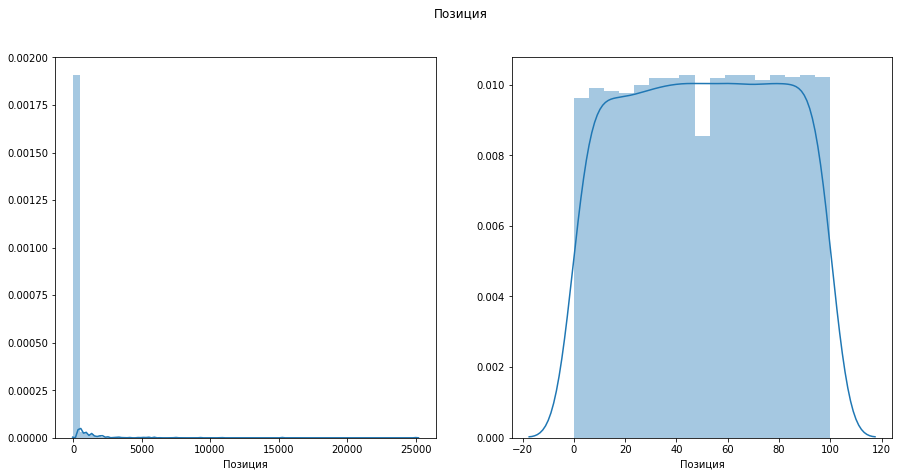

In [452]:
plt.figure(figsize = (15, 7));
plt.suptitle('Позиция');

plt.subplot(1, 2, 1);
sns.distplot(dataset_hist['Позиция']);

plt.subplot(1, 2, 2);
sns.distplot(dataset_overall['Позиция']);

plt.show()

Справа получили ожидаемое равномерное распределение, а слева кажется что-то логнормальное, поэтому прологарифмируем левую часть и посмотрим что получится:

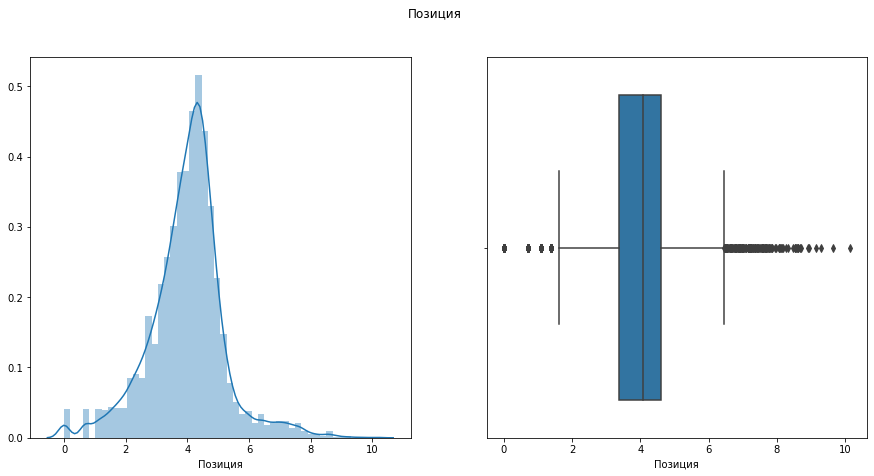

In [453]:
plt.figure(figsize = (15, 7));
plt.suptitle('Позиция');

plt.subplot(1, 2, 1);
sns.distplot(np.log(dataset_hist['Позиция'] +1));

plt.subplot(1, 2, 2);
sns.boxplot(np.log(dataset_hist['Позиция'] + 1));

plt.show()

Ну нормального распределения все же не получилось, но относительно симметричное вышло. Добавим логарифм как потенциальный отклик в данные:

In [454]:
dataset_hist['log_pos'] = np.log(dataset_hist['Позиция'] + 1)
dataset_overall['log_pos'] = np.log(dataset_overall['Позиция'] + 1)

У нас явно есть категориальные признаки, будем их складывать в отдельный список для последующей обработки:

In [455]:
cat_cols = []

Из явно ненужных столбцов с первого взгляда у нас артикул - сразу удалим его чтобы не мешался

In [456]:
dataset_hist.drop(['Артикул'], axis = 1, inplace = True)
dataset_overall.drop(['Артикул'], axis = 1, inplace = True)

# Дата 

In [457]:
dataset_hist['Дата'].min(), dataset_hist['Дата'].max(), \
dataset_overall['Дата'].min(), dataset_overall['Дата'].max() 

(Timestamp('2020-06-25 00:00:00'),
 Timestamp('2020-07-08 00:00:00'),
 Timestamp('2020-06-25 00:00:00'),
 Timestamp('2020-07-08 00:00:00'))

Период небольшой, так что из даты есть смысл извлечь только день недели:

In [458]:
dataset_hist['weekday'] = dataset_hist['Дата'].apply(lambda x: x.weekday())
dataset_overall['weekday'] = dataset_hist['Дата'].apply(lambda x: x.weekday())
dataset_hist.drop(['Дата'], axis = 1, inplace = True)
dataset_overall.drop(['Дата'], axis = 1, inplace = True)

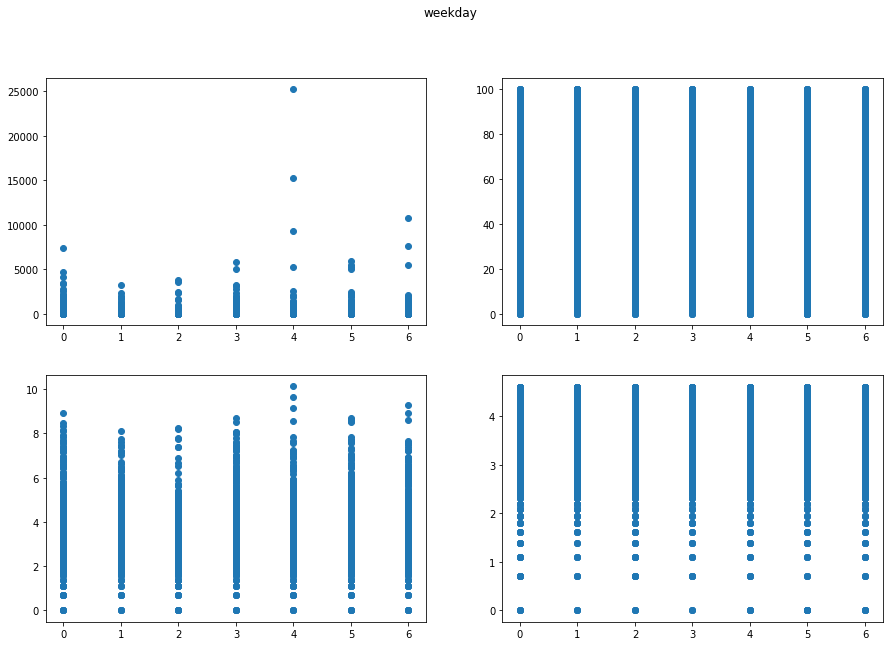

In [459]:
plt.figure(figsize = (15, 10));
plt.suptitle('weekday');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['weekday'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['weekday'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['weekday'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['weekday'], y = dataset_overall['log_pos']);

plt.show()

In [460]:
cat_cols.append('weekday')

# Рейтинг

In [461]:
dataset_hist['Рейтинг'].describe()

count    4154.000000
mean        4.564998
std         0.776948
min         0.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Рейтинг, dtype: float64

In [462]:
dataset_overall['Рейтинг'].describe()

count    4176.000000
mean        4.617816
std         0.565269
min         0.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Рейтинг, dtype: float64

In [463]:
dataset_hist['Рейтинг'].value_counts()

5    2740
4    1200
3     149
0      57
2       8
Name: Рейтинг, dtype: int64

In [464]:
dataset_overall['Рейтинг'].value_counts()

5    2727
4    1317
3     125
0       4
2       3
Name: Рейтинг, dtype: int64

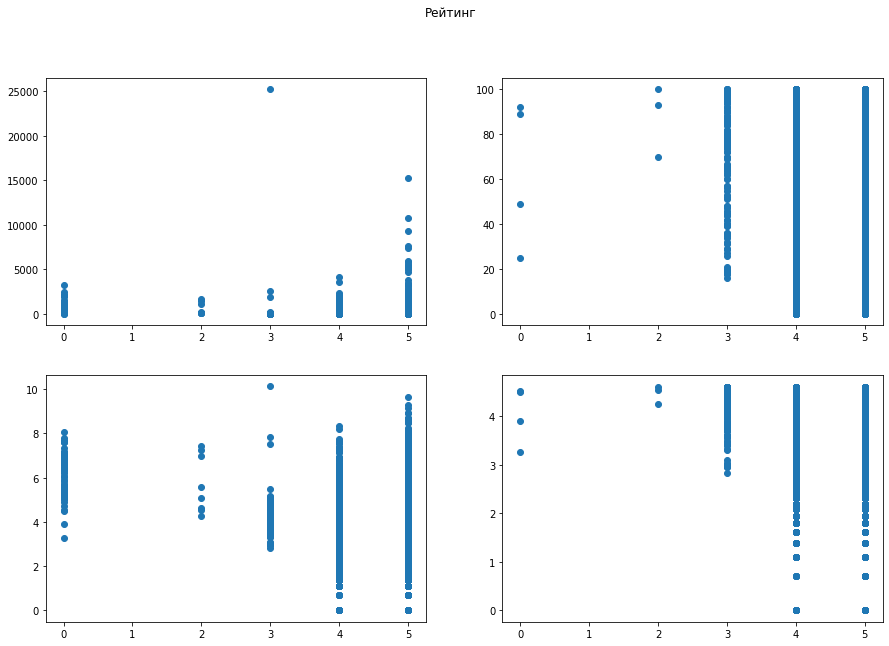

In [465]:
plt.figure(figsize = (15, 10));
plt.suptitle('Рейтинг');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Рейтинг'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Рейтинг'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Рейтинг'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Рейтинг'], y = dataset_overall['log_pos']);

plt.show()

In [466]:
cat_cols.append('Рейтинг')

# Новый ли товар на этот день?

In [467]:
dataset_hist['Новый ли товар на этот день?'].value_counts()

f    3860
t     294
Name: Новый ли товар на этот день?, dtype: int64

In [468]:
dataset_overall['Новый ли товар на этот день?'].value_counts()

f    3967
t     209
Name: Новый ли товар на этот день?, dtype: int64

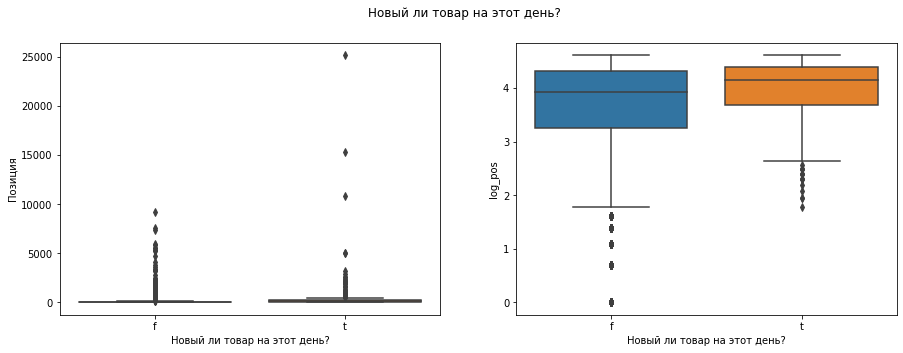

In [469]:
plt.figure(figsize = (15, 5));
plt.suptitle('Новый ли товар на этот день?');

plt.subplot(1, 2, 1);
sns.boxplot(x = dataset_hist['Новый ли товар на этот день?'], y = dataset_hist['Позиция']);

plt.subplot(1, 2, 2);
sns.boxplot(x = dataset_overall['Новый ли товар на этот день?'], y = dataset_overall['log_pos']);

plt.show()

In [470]:
cat_cols.append('Новый ли товар на этот день?')

# Категория

In [471]:
dataset_hist['Категория'].value_counts()

Женские блузки и рубашки    1402
Мужские джинсы              1392
Босоножки женские           1360
Name: Категория, dtype: int64

In [472]:
dataset_overall['Категория'].value_counts()

Женские блузки и рубашки    1413
Мужские джинсы              1395
Босоножки женские           1368
Name: Категория, dtype: int64

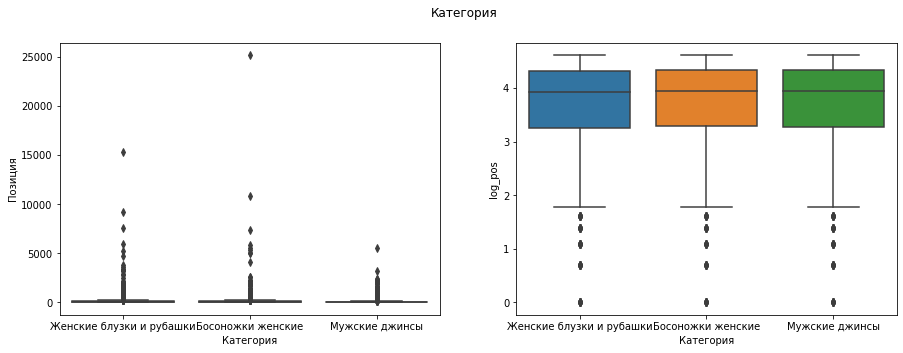

In [473]:
plt.figure(figsize = (15, 5));
plt.suptitle('Категория');

plt.subplot(1, 2, 1);
sns.boxplot(x = dataset_hist['Категория'], y = dataset_hist['Позиция']);

plt.subplot(1, 2, 2);
sns.boxplot(x = dataset_overall['Категория'], y = dataset_overall['log_pos']);

plt.show()

In [474]:
cat_cols.append('Категория')

In [475]:
cat_cols

['weekday', 'Рейтинг', 'Новый ли товар на этот день?', 'Категория']

# Отзывы

In [476]:
dataset_hist['Отзывы'].describe()

count    4154.000000
mean      161.510111
std       272.631057
min         0.000000
25%        17.000000
50%        43.000000
75%       171.000000
max      1254.000000
Name: Отзывы, dtype: float64

In [477]:
dataset_overall['Отзывы'].describe()

count    4176.000000
mean      162.490661
std       261.615291
min         0.000000
25%        19.000000
50%        60.000000
75%       175.000000
max      1254.000000
Name: Отзывы, dtype: float64

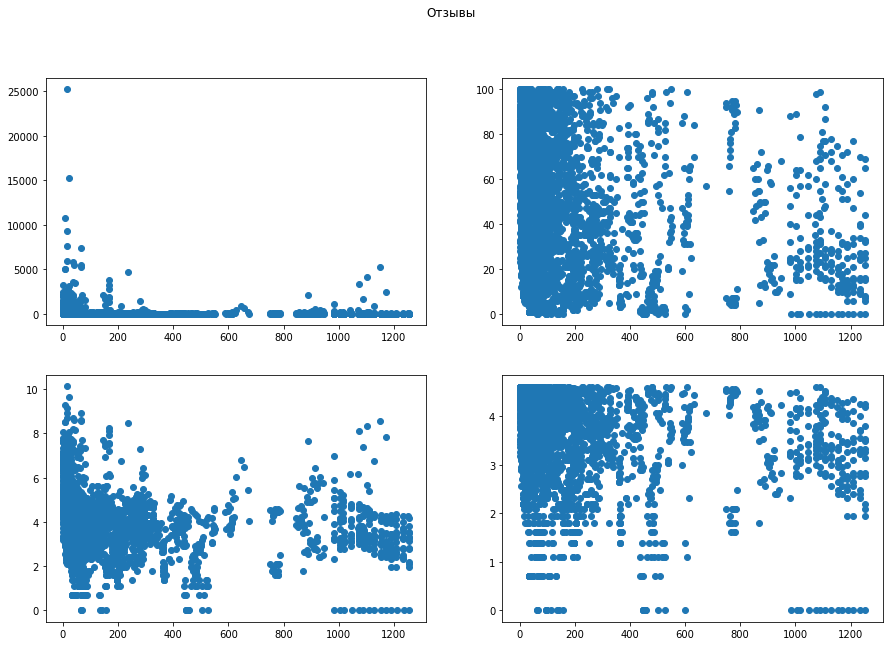

In [478]:
plt.figure(figsize = (15, 10));
plt.suptitle('Отзывы');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Отзывы'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Отзывы'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Отзывы'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Отзывы'], y = dataset_overall['log_pos']);

plt.show()

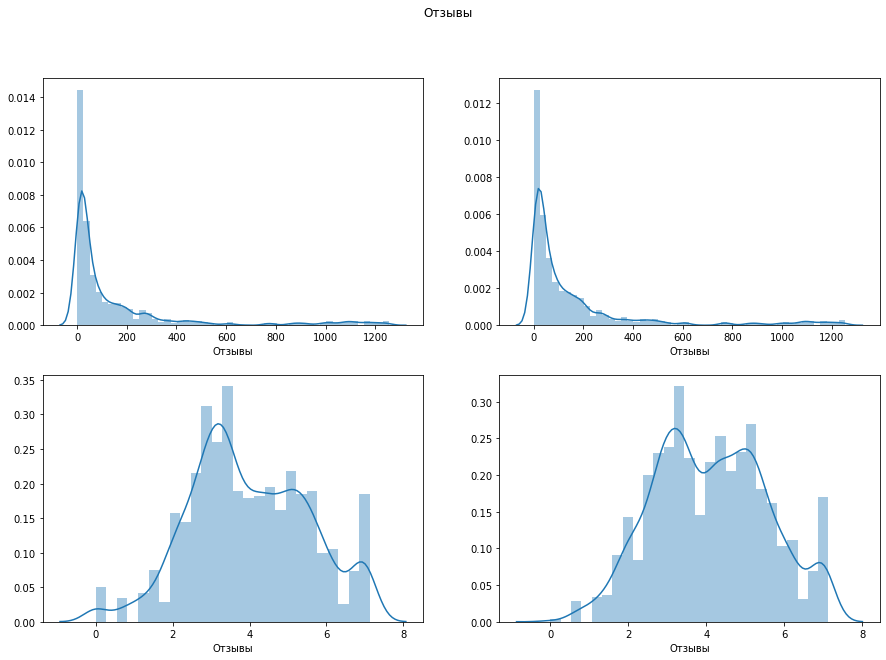

In [479]:
plt.figure(figsize = (15, 10));
plt.suptitle('Отзывы');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Отзывы']);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Отзывы']);

plt.subplot(2, 2, 3);
sns.distplot(np.log(dataset_hist['Отзывы'] + 1));

plt.subplot(2, 2, 4);
sns.distplot(np.log(dataset_overall['Отзывы'] + 1));

plt.show()

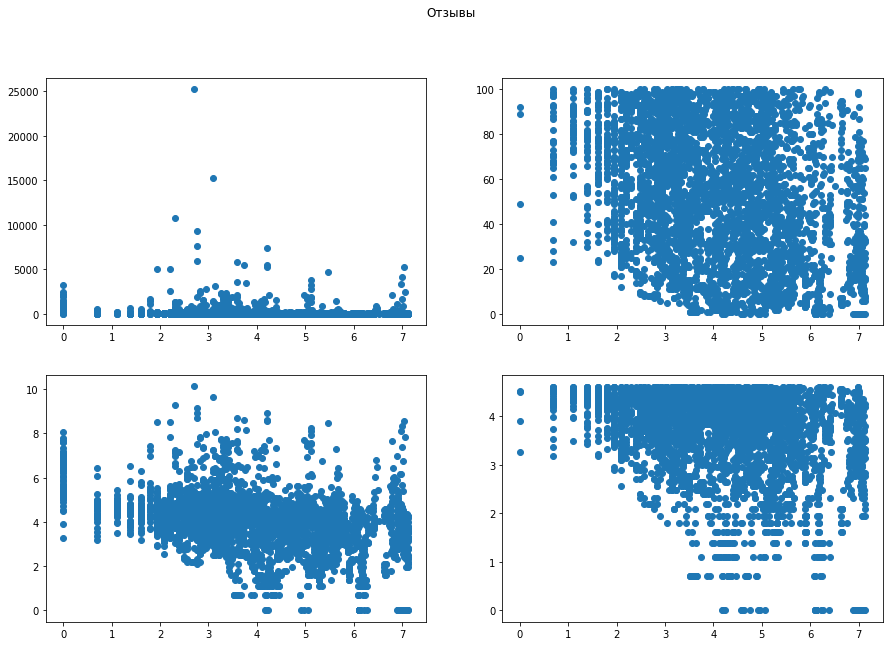

In [481]:
dataset_hist['Отзывы'] = np.log(dataset_hist['Отзывы'] + 1)
dataset_overall['Отзывы'] = np.log(dataset_overall['Отзывы'] + 1)

plt.figure(figsize = (15, 10));
plt.suptitle('Отзывы');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Отзывы'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Отзывы'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Отзывы'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Отзывы'], y = dataset_overall['log_pos']);

plt.show()

# Остатки

In [487]:
dataset_hist['Остатки'] = dataset_hist['Остатки'].astype(int)
dataset_overall['Остатки'] = dataset_overall['Остатки'].astype(int)

In [488]:
dataset_hist['Остатки'].describe()

count    4154.000000
mean      508.086182
std       603.972414
min         0.000000
25%       119.000000
50%       351.000000
75%       663.000000
max      5211.000000
Name: Остатки, dtype: float64

In [489]:
dataset_overall['Остатки'].describe()

count    4176.000000
mean      498.133381
std       597.996105
min         2.000000
25%       125.000000
50%       337.000000
75%       639.000000
max      5211.000000
Name: Остатки, dtype: float64

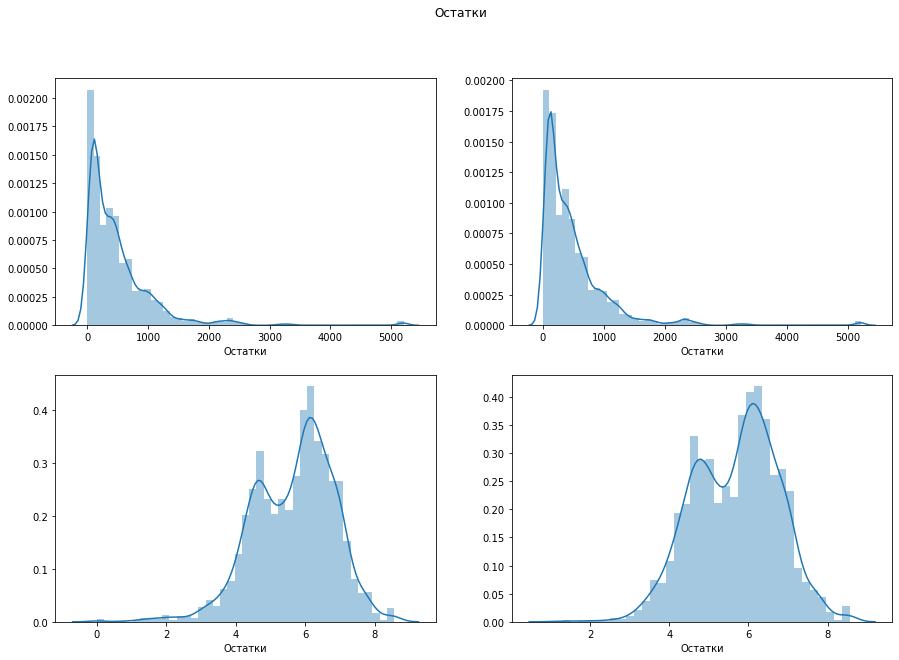

In [492]:
plt.figure(figsize = (15, 10));
plt.suptitle('Остатки');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Остатки']);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Остатки']);

plt.subplot(2, 2, 3);
sns.distplot(np.log(dataset_hist['Остатки'] + 1));

plt.subplot(2, 2, 4);
sns.distplot(np.log(dataset_overall['Остатки'] + 1));

plt.show()

Логирмирование оставляем. Есть смесь, скорее всего объясняется категорией.

In [493]:
dataset_hist['Остатки'] = np.log(dataset_hist['Остатки'] + 1)
dataset_overall['Остатки'] = np.log(dataset_overall['Остатки'] + 1)

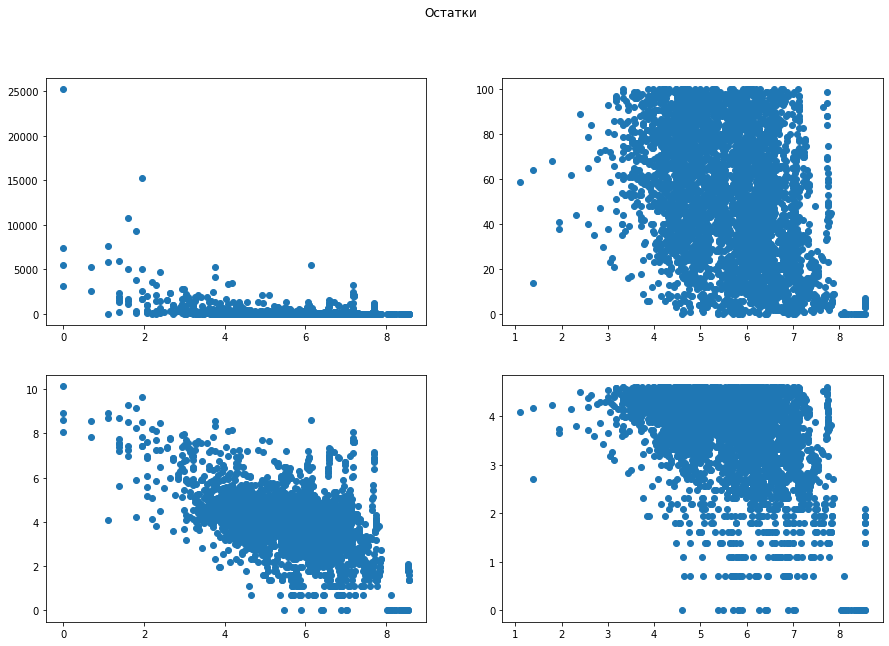

In [494]:
plt.figure(figsize = (15, 10));
plt.suptitle('Остатки');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Остатки'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Остатки'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Остатки'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Остатки'], y = dataset_overall['log_pos']);

plt.show()

# Продажи по карточке

In [495]:
dataset_hist['Продажи по карточке'].describe()

count     4154.000000
mean       844.320173
std       1417.438936
min          0.000000
25%        100.000000
50%        300.000000
75%        900.000000
max      10900.000000
Name: Продажи по карточке, dtype: float64

In [496]:
dataset_overall['Продажи по карточке'].describe()

count     4176.000000
mean       896.496648
std       1413.393764
min          1.000000
25%        100.000000
50%        400.000000
75%       1000.000000
max      11400.000000
Name: Продажи по карточке, dtype: float64

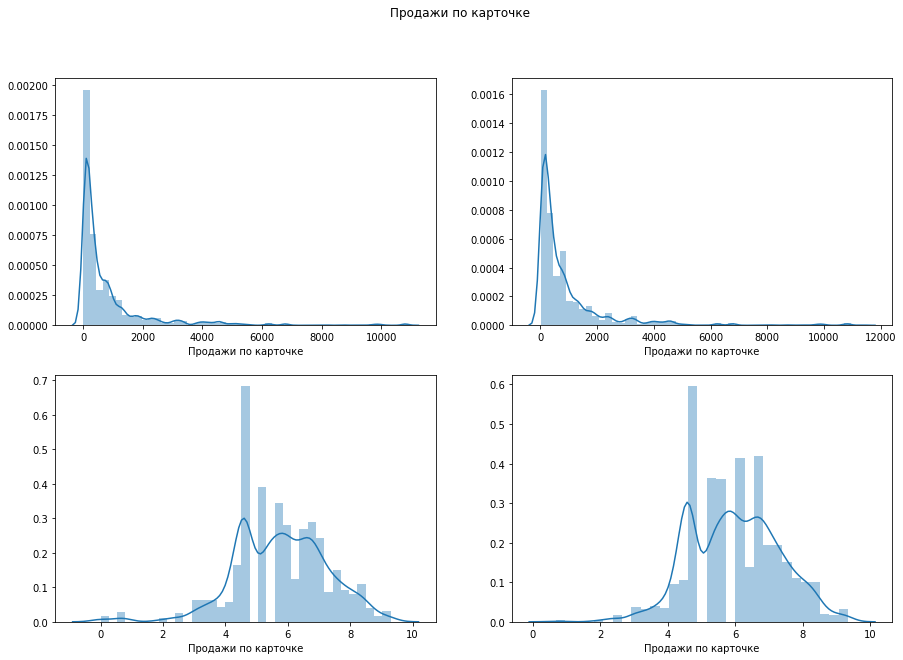

In [497]:
plt.figure(figsize = (15, 10));
plt.suptitle('Продажи по карточке');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Продажи по карточке']);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Продажи по карточке']);

plt.subplot(2, 2, 3);
sns.distplot(np.log(dataset_hist['Продажи по карточке'] + 1));

plt.subplot(2, 2, 4);
sns.distplot(np.log(dataset_overall['Продажи по карточке'] + 1));

plt.show()

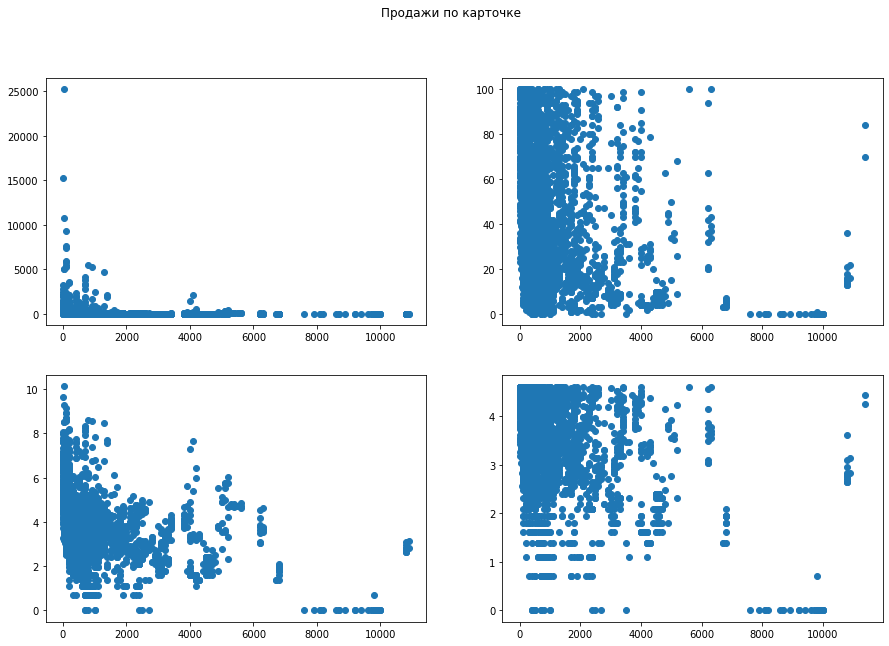

In [498]:
plt.figure(figsize = (15, 10));
plt.suptitle('Продажи по карточке');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Продажи по карточке'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Продажи по карточке'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Продажи по карточке'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Продажи по карточке'], y = dataset_overall['log_pos']);

plt.show()

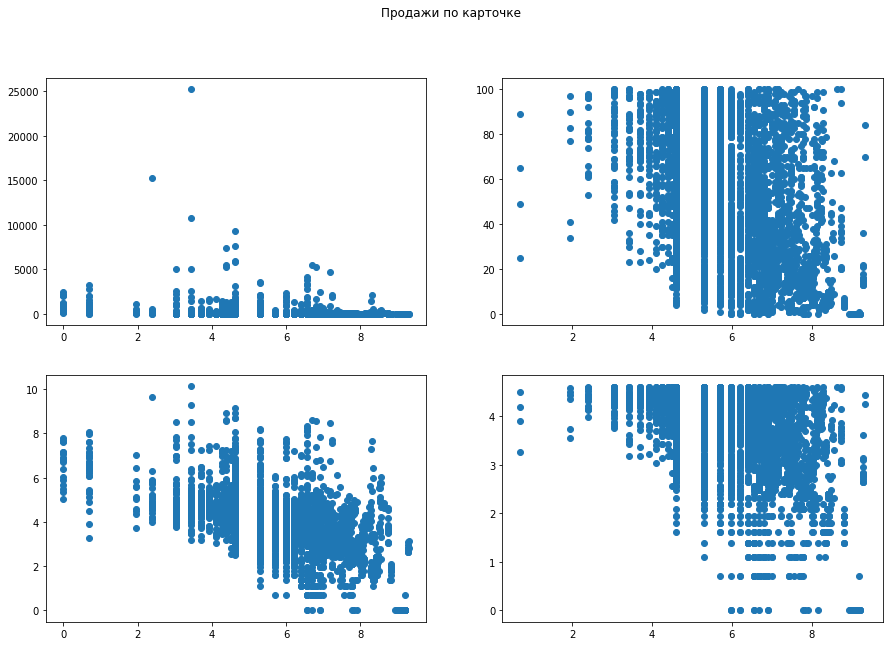

In [499]:
plt.figure(figsize = (15, 10));
plt.suptitle('Продажи по карточке');

plt.subplot(2, 2, 1);
plt.scatter(np.log(dataset_hist['Продажи по карточке'] + 1), y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(np.log(dataset_overall['Продажи по карточке'] + 1), y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(np.log(dataset_hist['Продажи по карточке'] + 1), y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(np.log(dataset_overall['Продажи по карточке'] + 1), y = dataset_overall['log_pos']);

plt.show()

In [500]:
dataset_hist['Продажи по карточке'] = np.log(dataset_hist['Продажи по карточке'] + 1)
dataset_overall['Продажи по карточке'] = np.log(dataset_overall['Продажи по карточке'] + 1)

# Цена

In [501]:
dataset_hist['Цена'].describe()

count    4154.000000
mean     2012.221955
std      1612.528825
min         0.000000
25%       943.000000
50%      1499.000000
75%      2999.000000
max      8900.000000
Name: Цена, dtype: float64

In [502]:
dataset_overall['Цена'].describe()

count    4176.000000
mean     2063.795019
std      1652.014512
min         0.000000
25%       999.000000
50%      1499.000000
75%      3020.000000
max      8900.000000
Name: Цена, dtype: float64

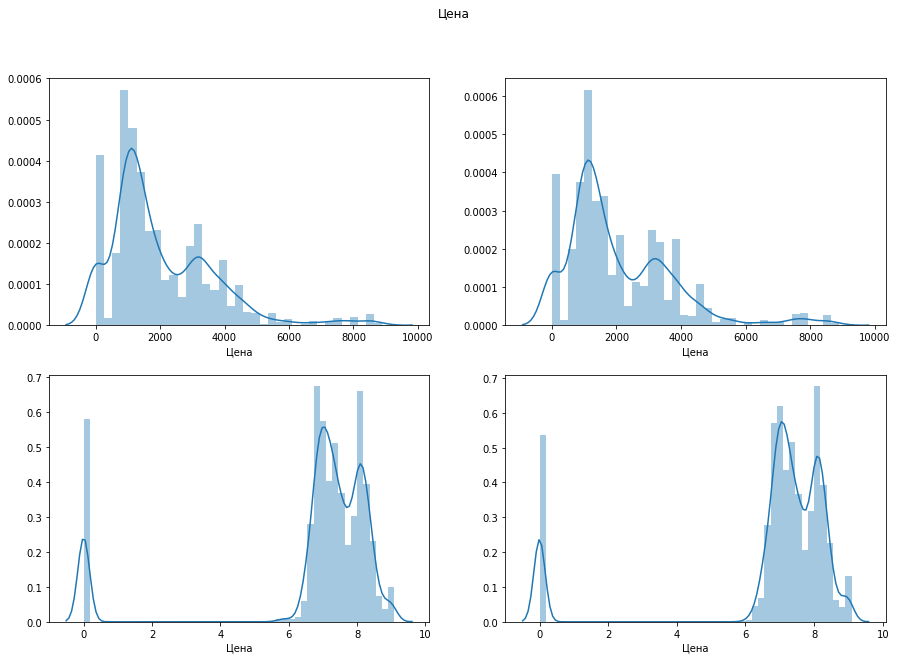

In [503]:
plt.figure(figsize = (15, 10));
plt.suptitle('Цена');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Цена'].dropna().astype(int));

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Цена'].dropna().astype(int));

plt.subplot(2, 2, 3);
sns.distplot(np.log(dataset_hist['Цена'].dropna().astype(int) + 1));

plt.subplot(2, 2, 4);
sns.distplot(np.log(dataset_overall['Цена'].dropna().astype(int) + 1));

plt.show()

Данные логнормальные, есть смесь. Скорее всего объясняется категорией

In [504]:
dataset_hist['Цена'] = np.log(dataset_hist['Цена'] + 1)
dataset_overall['Цена'] = np.log(dataset_overall['Цена'] + 1)

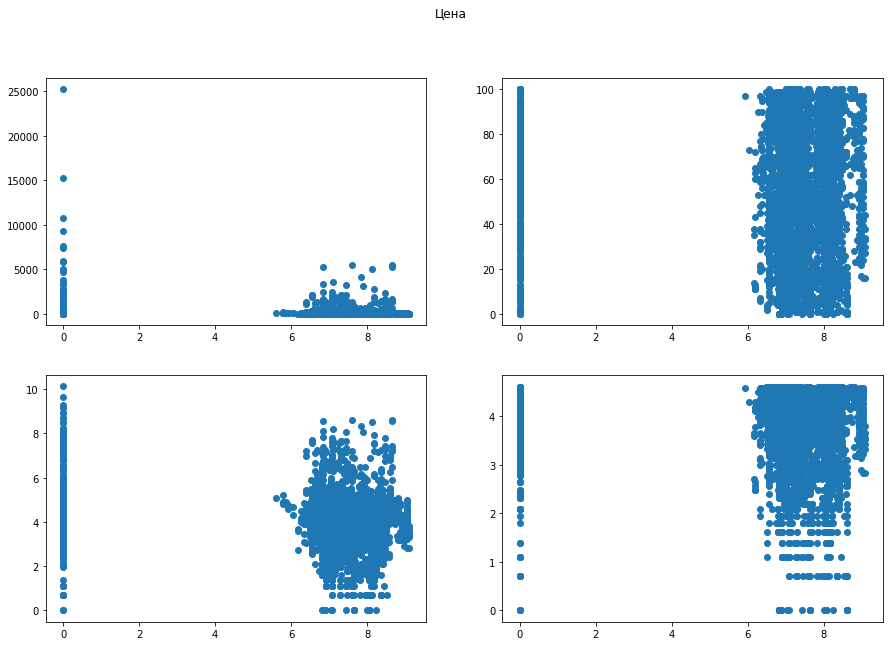

In [520]:
plt.figure(figsize = (15, 10));
plt.suptitle('Цена');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Цена'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Цена'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Цена'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Цена'], y = dataset_overall['log_pos']);

plt.show()

# Старая цена

In [506]:
dataset_hist['Старая цена'].describe()

count     4154.000000
mean      2824.321858
std       2780.724687
min          0.000000
25%        699.000000
50%       1899.000000
75%       4200.000000
max      14900.000000
Name: Старая цена, dtype: float64

In [507]:
dataset_overall['Старая цена'].describe()

count     4176.000000
mean      2919.714320
std       2807.433915
min          0.000000
25%        999.000000
50%       1899.000000
75%       4477.000000
max      14900.000000
Name: Старая цена, dtype: float64

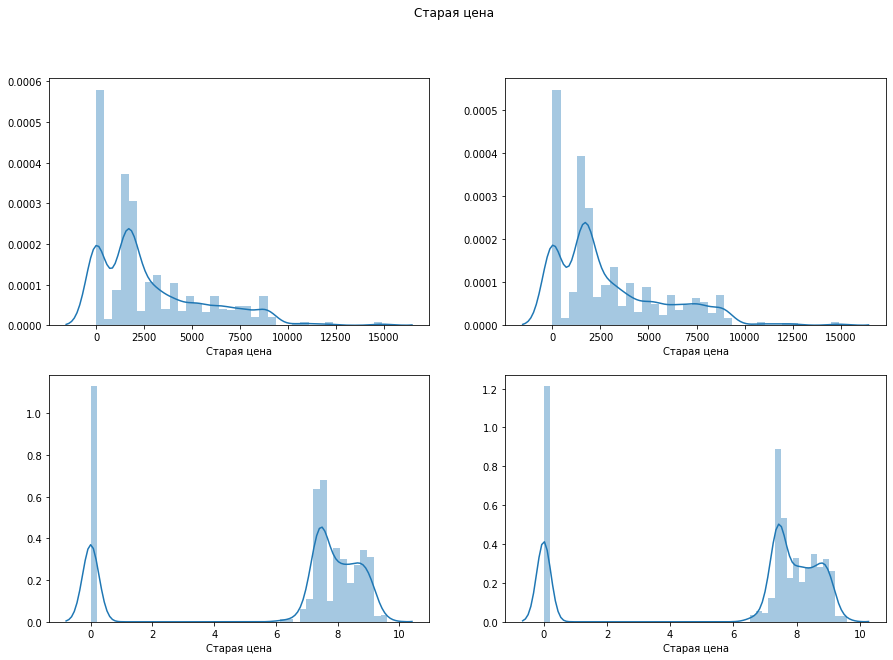

In [508]:
plt.figure(figsize = (15, 10));
plt.suptitle('Старая цена');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Старая цена']);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Старая цена']);

plt.subplot(2, 2, 3);
sns.distplot(np.log(dataset_hist['Старая цена'] + 1));

plt.subplot(2, 2, 4);
sns.distplot(np.log(dataset_overall['Старая цена'] + 1));

plt.show()

In [509]:
dataset_hist['Старая цена'] = np.log(dataset_hist['Старая цена'] + 1)
dataset_overall['Старая цена'] = np.log(dataset_overall['Старая цена'] + 1)

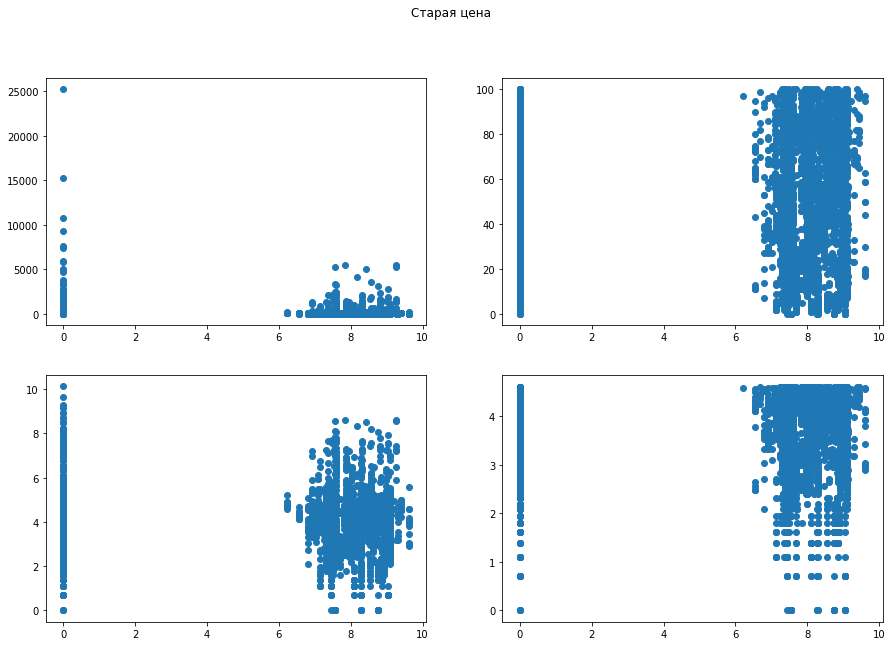

In [522]:
plt.figure(figsize = (15, 10));
plt.suptitle('Старая цена');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Старая цена'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Старая цена'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Старая цена'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Старая цена'], y = dataset_overall['log_pos']);

plt.show()

# Изменение остатков

In [513]:
dataset_hist['Изменение остатков'] = dataset_hist['Изменение остатков'].astype(int)
dataset_overall['Изменение остатков'] = dataset_overall['Изменение остатков'].astype(int)

In [514]:
dataset_hist['Изменение остатков'].describe()

count    4154.000000
mean       80.978575
std       313.243662
min      -237.000000
25%       -10.000000
50%        -3.000000
75%         8.000000
max      5187.000000
Name: Изменение остатков, dtype: float64

In [515]:
dataset_overall['Изменение остатков'].describe()

count    4176.000000
mean       79.357998
std       311.659701
min      -237.000000
25%       -11.000000
50%        -3.000000
75%         7.000000
max      5187.000000
Name: Изменение остатков, dtype: float64

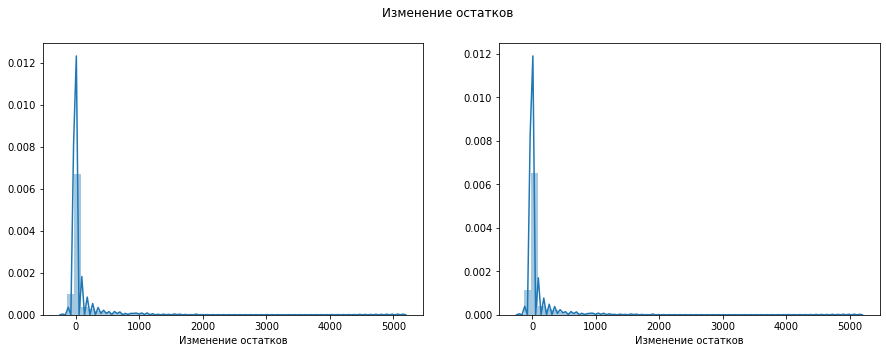

In [518]:
plt.figure(figsize = (15, 5));
plt.suptitle('Изменение остатков');

plt.subplot(1, 2, 1);
sns.distplot(dataset_hist['Изменение остатков']);

plt.subplot(1, 2, 2);
sns.distplot(dataset_overall['Изменение остатков']);

plt.show()

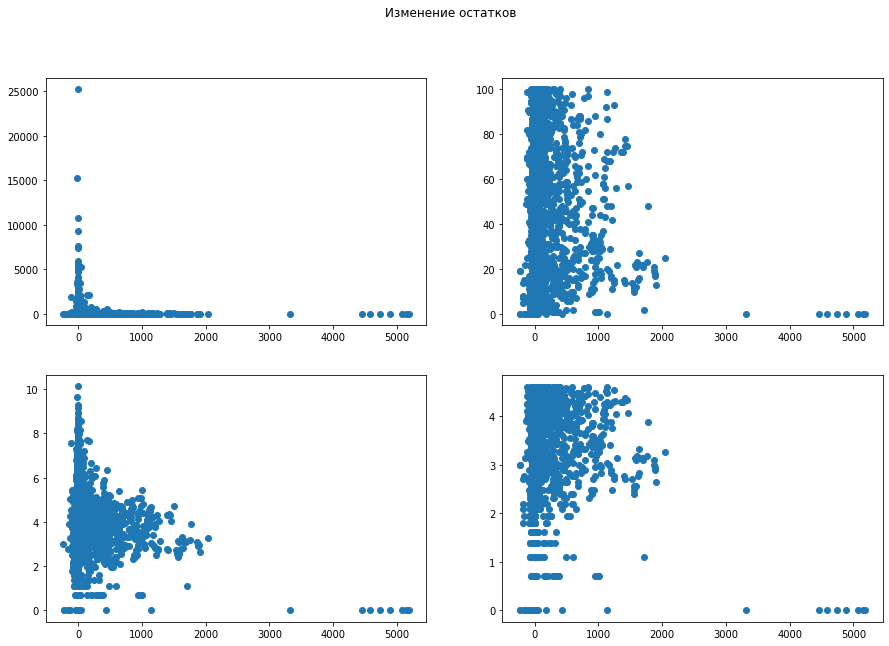

In [523]:
plt.figure(figsize = (15, 10));
plt.suptitle('Изменение остатков');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Изменение остатков'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Изменение остатков'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Изменение остатков'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Изменение остатков'], y = dataset_overall['log_pos']);

plt.show()

# Новые отзывы

In [524]:
dataset_hist['Новые отзывы'].describe()

count    4154.000000
mean        2.539239
std        15.926542
min        -1.000000
25%         0.000000
50%         1.000000
75%         2.000000
max       982.000000
Name: Новые отзывы, dtype: float64

In [525]:
dataset_overall['Новые отзывы'].describe()

count    4176.000000
mean        2.279693
std         4.527688
min       -14.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        30.000000
Name: Новые отзывы, dtype: float64

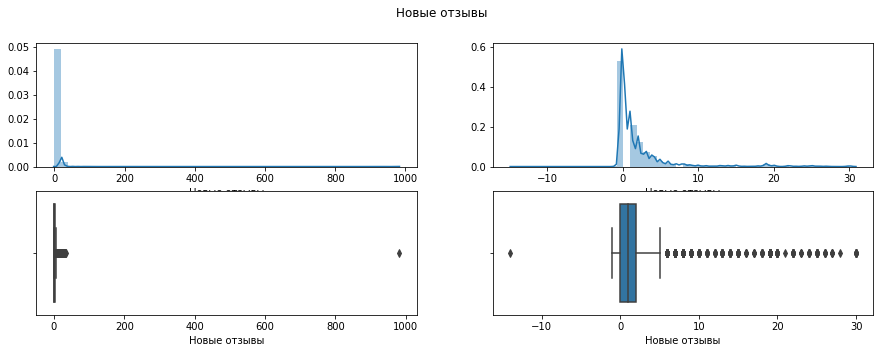

In [528]:
plt.figure(figsize = (15, 5));
plt.suptitle('Новые отзывы');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Новые отзывы']);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Новые отзывы']);

plt.subplot(2, 2, 3);
sns.boxplot(dataset_hist['Новые отзывы']);

plt.subplot(2, 2, 4);
sns.boxplot(dataset_overall['Новые отзывы']);

plt.show()

В dataset_hist явный единичный выброс справа, а в dataset_overall слева - выкинем их:

In [529]:
dataset_hist = dataset_hist.loc[dataset_hist['Новые отзывы'] <= 800]
dataset_overall = dataset_overall.loc[dataset_overall['Новые отзывы'] > -10]

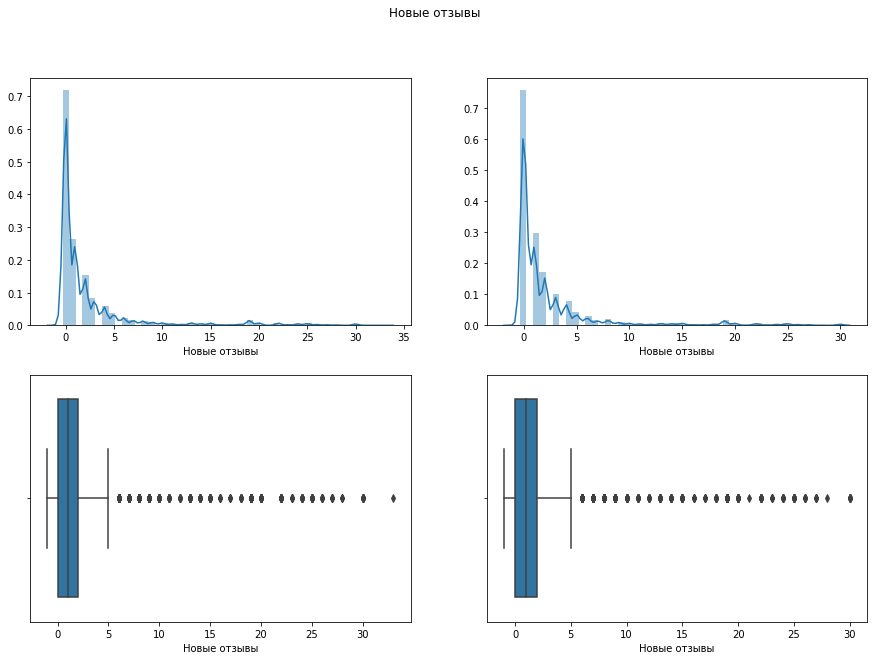

In [531]:
plt.figure(figsize = (15, 10));
plt.suptitle('Новые отзывы');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Новые отзывы']);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Новые отзывы']);

plt.subplot(2, 2, 3);
sns.boxplot(dataset_hist['Новые отзывы']);

plt.subplot(2, 2, 4);
sns.boxplot(dataset_overall['Новые отзывы']);

plt.show()

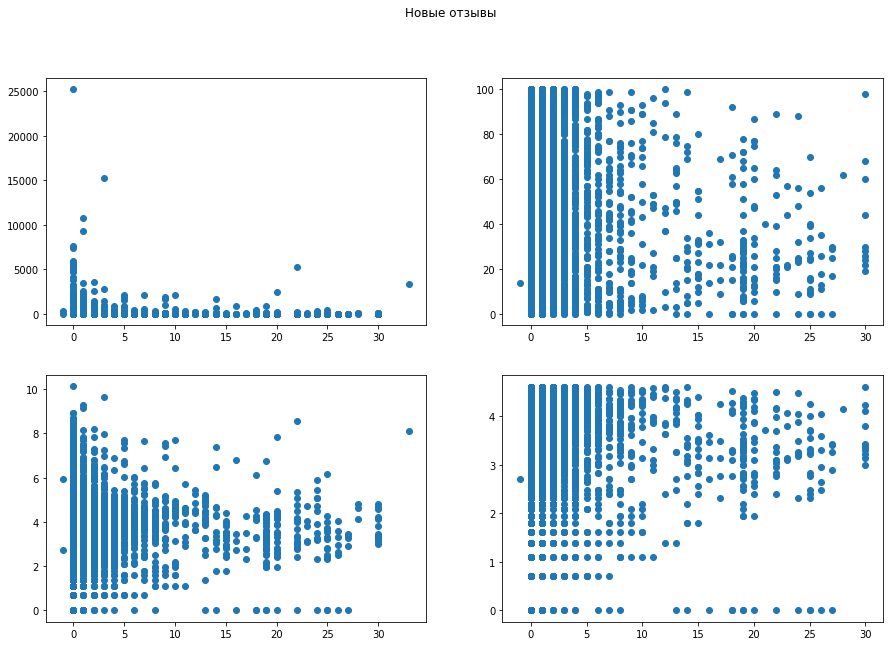

In [532]:
plt.figure(figsize = (15, 10));
plt.suptitle('Новые отзывы');

plt.subplot(2, 2, 1);
plt.scatter(dataset_hist['Новые отзывы'], y = dataset_hist['Позиция']);

plt.subplot(2, 2, 2);
plt.scatter(dataset_overall['Новые отзывы'], y = dataset_overall['Позиция']);

plt.subplot(2, 2, 3);
plt.scatter(dataset_hist['Новые отзывы'], y = dataset_hist['log_pos']);

plt.subplot(2, 2, 4);
plt.scatter(dataset_overall['Новые отзывы'], y = dataset_overall['log_pos']);

plt.show()

# Продажи за день

In [533]:
dataset_hist['Продажи за день'].describe()

count    4153.000000
mean       10.889959
std        35.248993
min      -100.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       500.000000
Name: Продажи за день, dtype: float64

In [534]:
dataset_overall['Продажи за день'].describe()

count    4175.000000
mean       11.588982
std        36.728444
min      -100.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       500.000000
Name: Продажи за день, dtype: float64

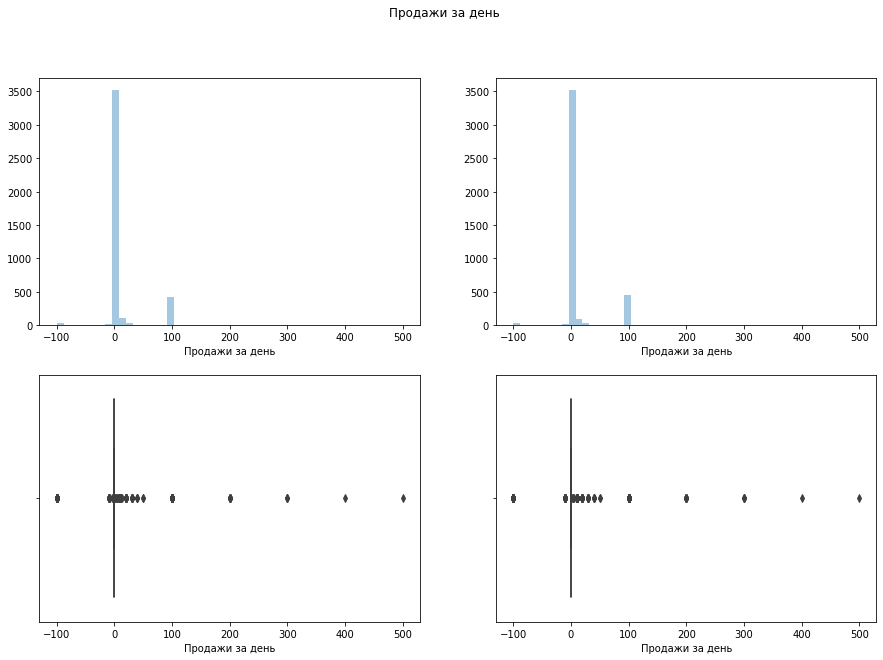

In [536]:
plt.figure(figsize = (15, 10));
plt.suptitle('Продажи за день');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Продажи за день'], kde=False);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Продажи за день'], kde=False);

plt.subplot(2, 2, 3);
sns.boxplot(dataset_hist['Продажи за день']);

plt.subplot(2, 2, 4);
sns.boxplot(dataset_overall['Продажи за день']);

plt.show()

Странные данные, оставим их пока как есть.

# Продажи за день по остаткам

In [539]:
dataset_hist['Продажи за день по остаткам'] = dataset_hist['Продажи за день по остаткам'].astype(int)
dataset_overall['Продажи за день по остаткам'] = dataset_overall['Продажи за день по остаткам'].astype(int)

In [540]:
dataset_hist['Продажи за день по остаткам'].describe()

count    4153.000000
mean       10.349868
std        15.493353
min       -71.000000
25%         2.000000
50%         6.000000
75%        13.000000
max       237.000000
Name: Продажи за день по остаткам, dtype: float64

In [541]:
dataset_overall['Продажи за день по остаткам'].describe()

count    4175.000000
mean       11.457246
std        18.125819
min       -71.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       237.000000
Name: Продажи за день по остаткам, dtype: float64

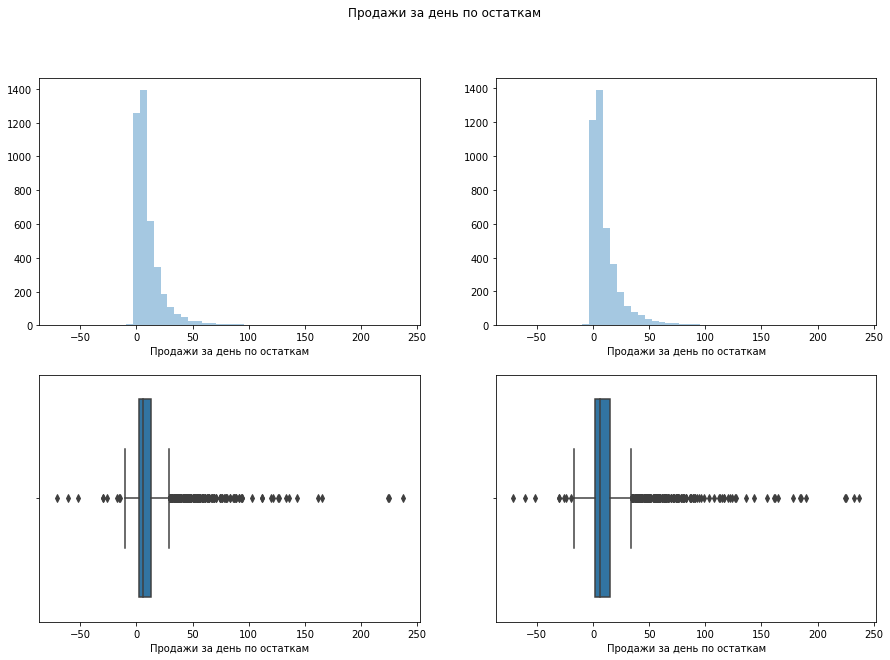

In [542]:
plt.figure(figsize = (15, 10));
plt.suptitle('Продажи за день по остаткам');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Продажи за день по остаткам'], kde=False);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Продажи за день по остаткам'], kde=False);

plt.subplot(2, 2, 3);
sns.boxplot(dataset_hist['Продажи за день по остаткам']);

plt.subplot(2, 2, 4);
sns.boxplot(dataset_overall['Продажи за день по остаткам']);

plt.show()

# Изменение позиции

In [543]:
dataset_hist['Изменение позиции'].describe()

count     4153.000000
mean        -0.424512
std        501.211094
min      -5510.000000
25%         -8.000000
50%         -1.000000
75%          3.000000
max      21837.000000
Name: Изменение позиции, dtype: float64

In [544]:
dataset_overall['Изменение позиции'].describe()

count    4175.000000
mean      -32.362395
std       294.853711
min     -8365.000000
25%        -9.000000
50%        -1.000000
75%         2.000000
max        97.000000
Name: Изменение позиции, dtype: float64

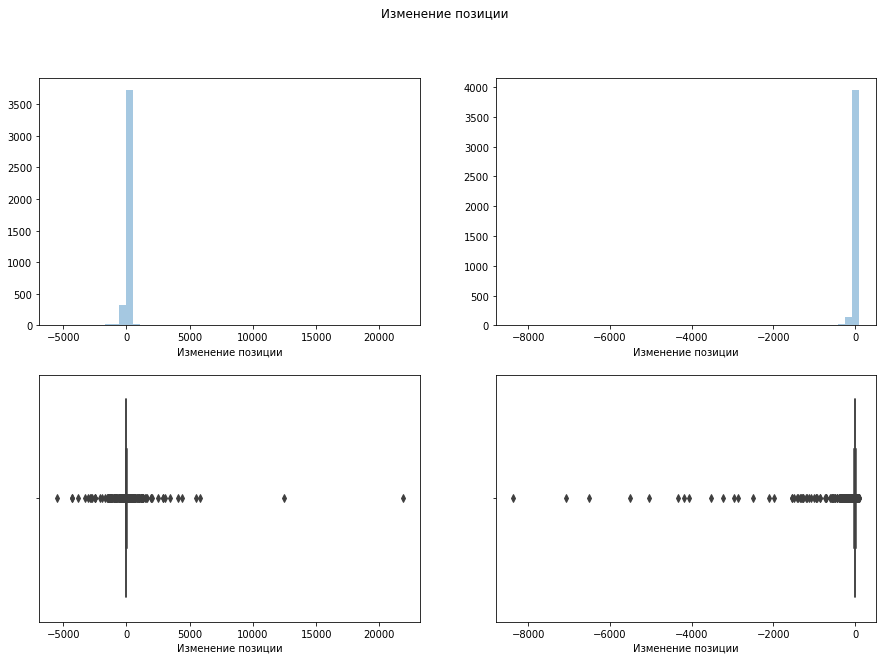

In [545]:
plt.figure(figsize = (15, 10));
plt.suptitle('Изменение позиции');

plt.subplot(2, 2, 1);
sns.distplot(dataset_hist['Изменение позиции'], kde=False);

plt.subplot(2, 2, 2);
sns.distplot(dataset_overall['Изменение позиции'], kde=False);

plt.subplot(2, 2, 3);
sns.boxplot(dataset_hist['Изменение позиции']);

plt.subplot(2, 2, 4);
sns.boxplot(dataset_overall['Изменение позиции']);

plt.show()

In [550]:
dataset_hist['weekday'].fillna(0, inplace = True)
dataset_overall['weekday'].fillna(0, inplace = True)

In [551]:
import pickle

with open('dataset_hist.pkl', 'wb') as file:
    pickle.dump(dataset_hist, file)
    
with open('dataset_overall.pkl', 'wb') as file:
    pickle.dump(dataset_overall, file)

In [547]:
cat_cols

['weekday', 'Рейтинг', 'Новый ли товар на этот день?', 'Категория']